<a href="https://colab.research.google.com/github/RoshanPoddaturi/Neural_Networks/blob/main/ICP5_700744925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adadelta

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define hyperparameters
encoding_dim = 32
input_dim = x_train.shape[1]
learning_rate = 1.0
batch_size = 128
epochs = 20

# Define the autoencoder model
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
optimizer = Adadelta(learning_rate=learning_rate)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Plotting function for original and reconstructed images
def plot_images(original, reconstructed, num_images=5):
    n = num_images
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize original and reconstructed images
plot_images(x_test, decoded_imgs)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Epoch 1/20
469/469 [==============================] - 4s 4ms/step - loss: 0.4354 - val_loss: 0.3703
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3504 - val_loss: 0.3385
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3293 - val_loss: 0.3268
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3215 - val_loss: 0.3200
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3169 - val_loss: 0.3163
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3136 - val_loss: 0.3137
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3110 - val_loss: 0.3113
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3087 - val_loss: 0.3111
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3068 - val_loss: 0.3069
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3049 - val_loss: 0.3082

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.4478 - val_loss: 0.3779
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3576 - val_loss: 0.3461
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3331 - val_loss: 0.3323
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3224 - val_loss: 0.3189
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3170 - val_loss: 0.3164
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3136 - val_loss: 0.3147
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3106 - val_loss: 0.3109
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3080 - val_loss: 0.3133
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3059 - val_loss: 0.3082
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3043 - val_loss: 0.3063

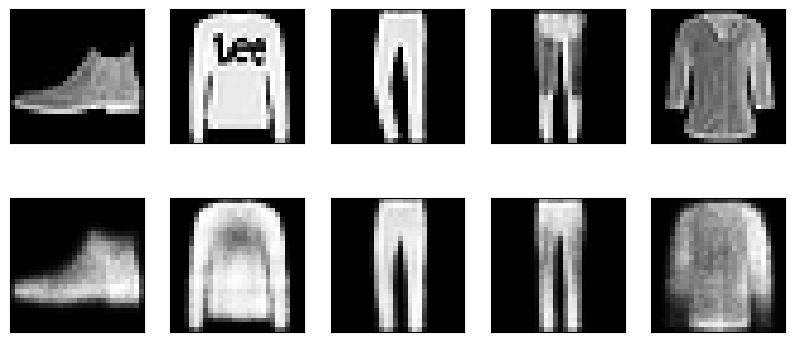

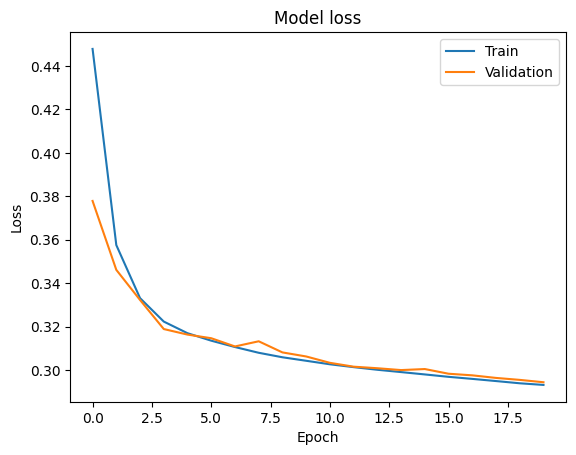

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adadelta

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define hyperparameters
encoding_dim = 32
input_dim = x_train.shape[1]
learning_rate = 1.0
batch_size = 128
epochs = 20

# Define the autoencoder model
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
optimizer = Adadelta(learning_rate=learning_rate)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Plotting function for original and reconstructed images
def plot_images(original, reconstructed, num_images=5):
    n = num_images
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize original and reconstructed images
plot_images(x_test, decoded_imgs)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()